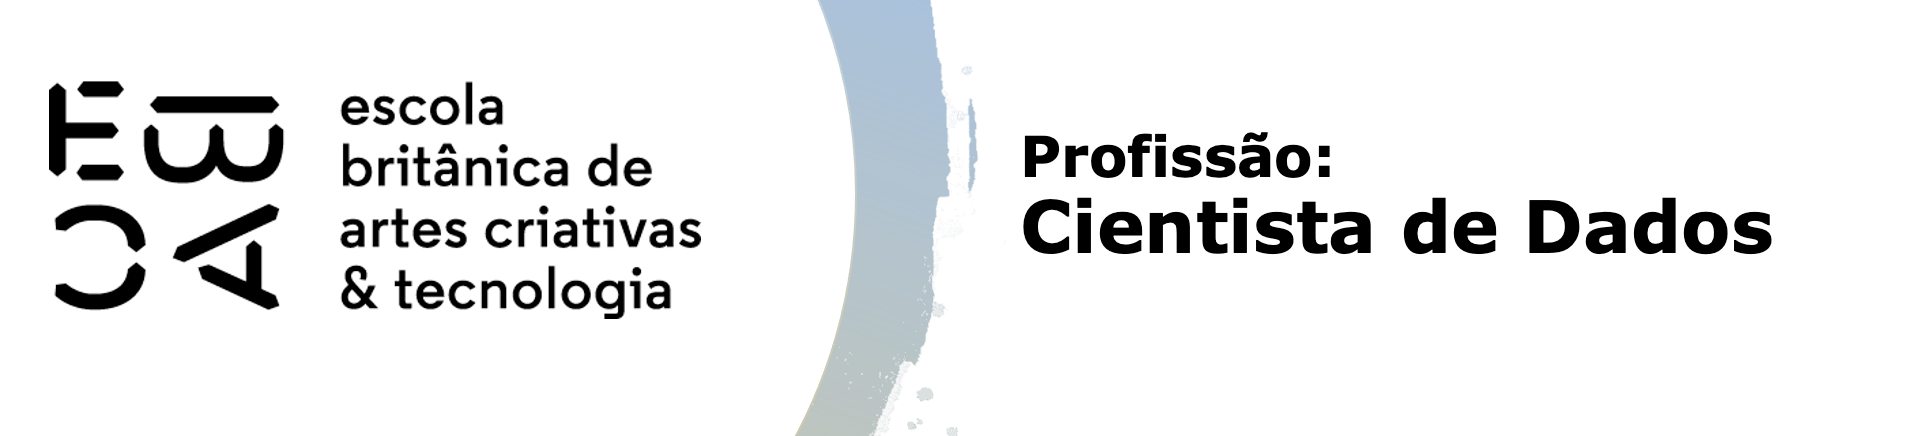

# Probabilidade - Tarefa

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [4]:
# Imports
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import math

import matplotlib.ticker as mtick
from scipy.stats import norm

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -p numpy,matplotlib,seaborn,scipy,math

numpy     : 1.21.5
matplotlib: 3.5.2
seaborn   : 0.11.2
scipy     : 1.9.1
math      : unknown



1. Uma máquina embala ração para cachorro em pacotes de 15 kg, mas cada pacote produzido acaba tendo um peso aleatório, com distribuição Normal, com média 15kg, mas com desvio padrão 0,1 kg. Obtenha a probabilidade de que um pacote selecionado aleatoriamente dessa produção tenha mais que 15,2 kg.

In [6]:
# Média
mu = 15

# Desvio padrão
sigma = 0.1

# Limite inferior do intervalo de valores
low = 15.2

# Limite superior do intervalo de valores
high = np.inf
 
# Probabilidade da variável aleatória normal estar dentro do intervalo de valores especificado 
prob_area = norm.cdf(high, mu, sigma) - norm.cdf(low, mu, sigma)
print(f'A probabilidade para valores entre {low:.2f} kg e {high:.2f} kg é de {prob_area:.2%}'.replace('.',','))

A probabilidade para valores entre 15,20 kg e inf kg é de 2,28%


2. Da máquina descrita acima, obtenha o percentil de ordem 95% para o peso dos pacotes. Ou seja, o valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%.

In [7]:
# Média
mu = 15

# Desvio padrão
sigma = 0.1

# Percentil
perc = 0.95

# Retorna o valor do peso 
peso = norm.ppf(perc, mu, sigma)
print(f'A probabilidade de um pacote ter peso menor que {peso:.4f} kg é de {perc:.2%}'.replace('.',','))

A probabilidade de um pacote ter peso menor que 15,1645 kg é de 95,00%


3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, a probabilidade de ser menor que cada um dos valores contidos no objeto $Y$ na célula abaixo:

### Distribuição Normal Padrão

In [8]:
#  Cria um array com 200 valores igualmente espaçados no intervalo de -6 a 6.
Y=np.linspace(-6, 6, 200)

# Média
mu = 0

# Variância
variance = 1

# Desvio padrão
sigma = math.sqrt(variance)

# Calcula a Probabilidade acumulada
prob_norm = norm.cdf(Y, mu, sigma)

# Retorna os dez primeiros elementos
prob_norm[:10] 

array([9.86587645e-10, 1.42773376e-09, 2.05881881e-09, 2.95834659e-09,
       4.23585138e-09, 6.04357383e-09, 8.59229446e-09, 1.21727145e-08,
       1.71842058e-08, 2.41733058e-08])

### Distribuição t-student com 5 graus de liberdade

In [9]:
# Graus de liberdade
gl = 5

# Calcula a probabilidade acumulada para cada valor em Y para a distribuição t-student
prob_t = stats.t.cdf(Y, gl)*sigma

# Retorna os dez primeiros elementos
prob_t[:10]

array([0.00092307, 0.00096571, 0.00101068, 0.00105814, 0.00110824,
       0.00116116, 0.00121706, 0.00127615, 0.00133864, 0.00140476])

4. Faça uma visualização gráfica dos dados do item anterior.

In [20]:
sns.set_theme()

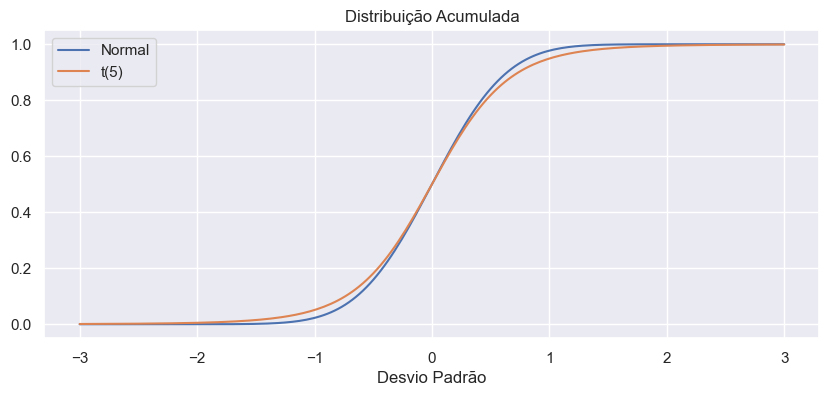

In [21]:
# Plot da Distribuição Normal Padrão e Distribuição T-Student
fig, ax = plt.subplots(figsize=(10,4))

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 200)

ax.plot(x, prob_norm, label='Normal')
ax.plot(x, prob_t, label='t(5)')

ax.set_title('Distribuição Acumulada')
ax.set_xlabel('Desvio Padrão')
ax.legend()

5. 3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, o percentil (a inversa da *CDF*) para cada um dos valores do objeto *P* abaixo:

### Distribuição Normal Padrão

In [22]:
# Cria um array P com 20 valores igualmente espaçados entre 0 e 1. 
P=np.linspace(0, 1, 20)

# Média
mu = 0

# Variância
variance = 1

# Desvio padrão
sigma = math.sqrt(variance)

# Percentis correspondentes aos valores de probabilidade acumulada
perc_norm = norm.ppf(P, mu, sigma)

perc_norm

array([       -inf, -1.61985626, -1.25211952, -1.00314797, -0.80459638,
       -0.63364   , -0.47950565, -0.33603814, -0.19920132, -0.06601181,
        0.06601181,  0.19920132,  0.33603814,  0.47950565,  0.63364   ,
        0.80459638,  1.00314797,  1.25211952,  1.61985626,         inf])

### Distribuição t-stident com 5 graus de liberdade

In [23]:
# Graus de liberdade
gl = 5

# Percentis correspondentes aos valores de probabilidade acumulada
perc_t = stats.t.ppf(P, gl)*sigma

perc_t

array([       -inf, -1.97489346, -1.4358593 , -1.11439619, -0.87612441,
       -0.68067217, -0.51027663, -0.35532778, -0.20979907, -0.06939058,
        0.06939058,  0.20979907,  0.35532778,  0.51027663,  0.68067217,
        0.87612441,  1.11439619,  1.4358593 ,  1.97489346,         inf])

6. Faça um gráfico com os dados do item anterior.

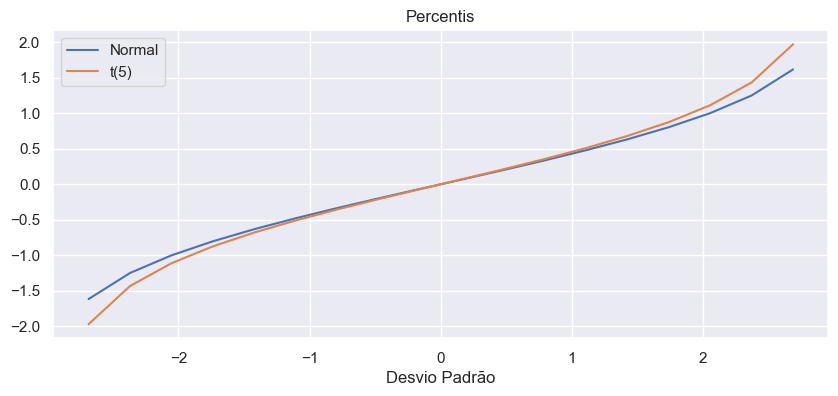

In [24]:
# PLot dos percentis das Distribuição Normal Padrão e Distribuição T-Student

fig, ax = plt.subplots(figsize=(10,4))

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 20)

ax.plot(x, perc_norm, label='Normal')

ax.plot(x, perc_t, label='t(5)')

ax.set_title('Percentis')
ax.set_xlabel('Desvio Padrão')
ax.legend()